#### Importando bibliotecas

In [69]:
import pandas as pd
import seaborn as sns
from scipy.stats import ranksums

#### Importando dados

In [17]:
data = pd.read_csv('./data/tips.csv')
data.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


#### Tradução

In [18]:
data.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [19]:
renomear ={ 
            'total_bill': 'valor_da_conta', 
            'tip': 'gorjeta', 
            'dessert': 'sobremesa', 
            'day': 'dia_da_semana', 
            'time': 'hora_do_dia', 
            'size': 'total_de_pessoas',
        }

In [20]:
gorjetas = data.rename(columns=renomear)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [21]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [22]:
sim_nao = {
    'No': 'Não', 
    'Yes': 'Sim',
}

In [23]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [24]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [25]:
dias = {
    'Sun': 'Domingo', 
    'Sat': 'Sábado', 
    'Thur': 'Quinta', 
    'Fri': 'Sexta',
}

In [26]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [27]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [28]:
hora = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço',
}

In [29]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [30]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: c:\users\ewerton\anaconda3\lib\site-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: 


#### Análise I - Valor da conta e gorjeta

In [32]:
gorjetas.columns


Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

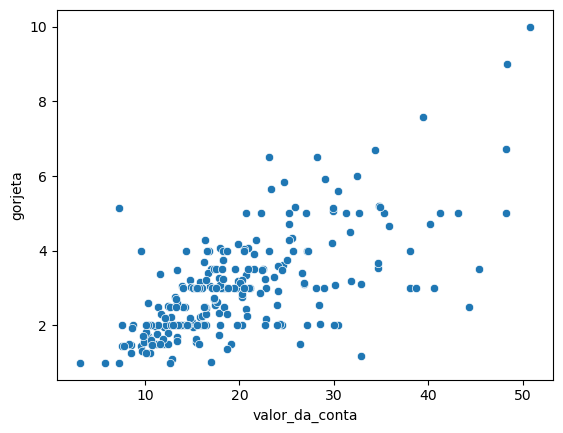

In [34]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente o valor da gorjeta aumenta conforme o valor da conta**

In [42]:
print(f'A base de dados contém {gorjetas.shape[0]} registros .')
print('registros que não são nulos:')
gorjetas.count()

A base de dados contém 244 registros .
registros que não são nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

#### Criando o campo porcentagem

In [46]:
gorjetas['porcentagem'] = (gorjetas.gorjeta / gorjetas.valor_da_conta).round(2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


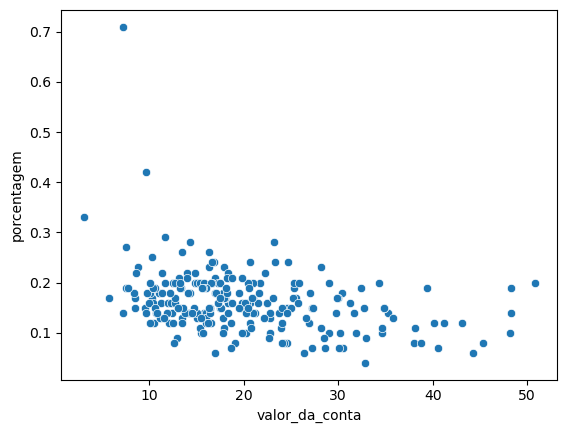

In [47]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

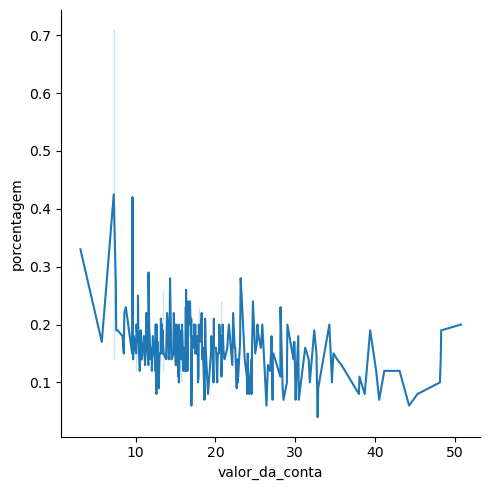

In [49]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

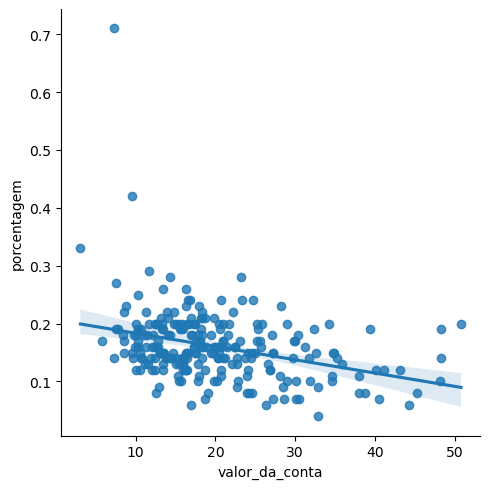

In [50]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

#### Análise II - Sobremesa

In [51]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [53]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [54]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


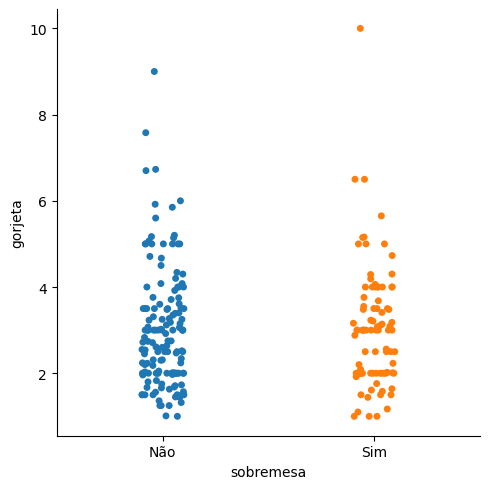

In [57]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

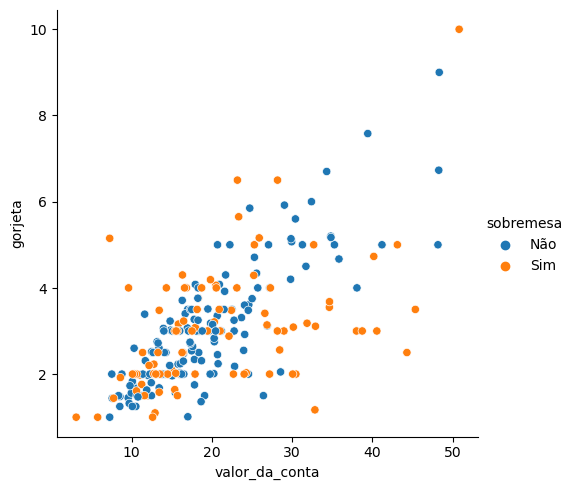

In [58]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

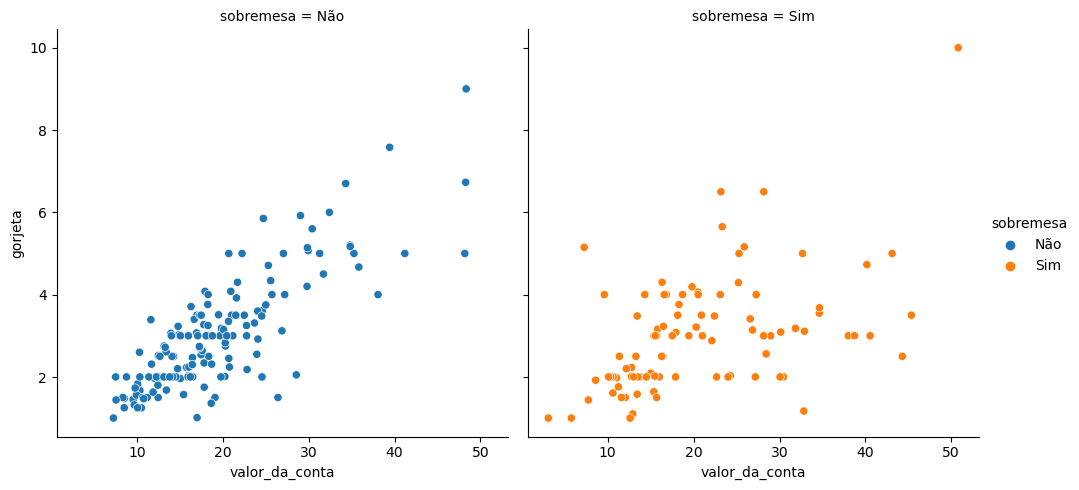

In [60]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

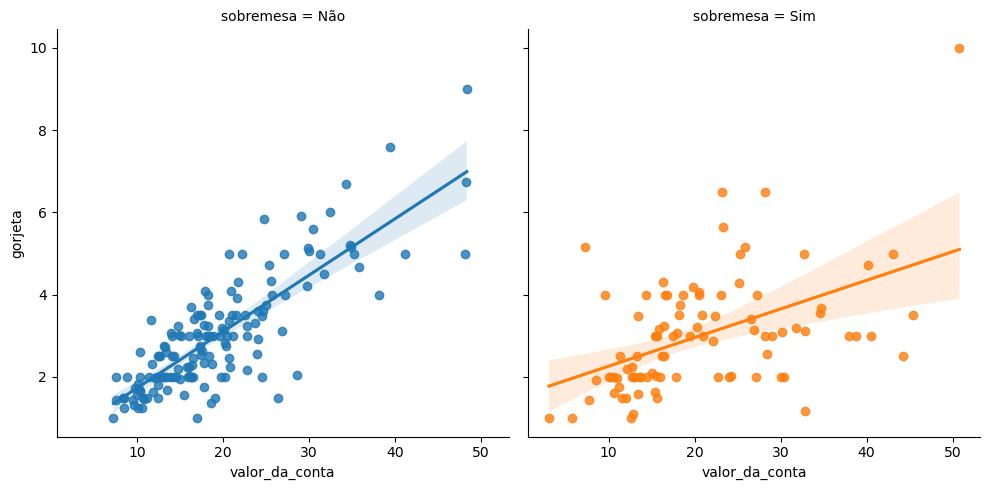

In [64]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

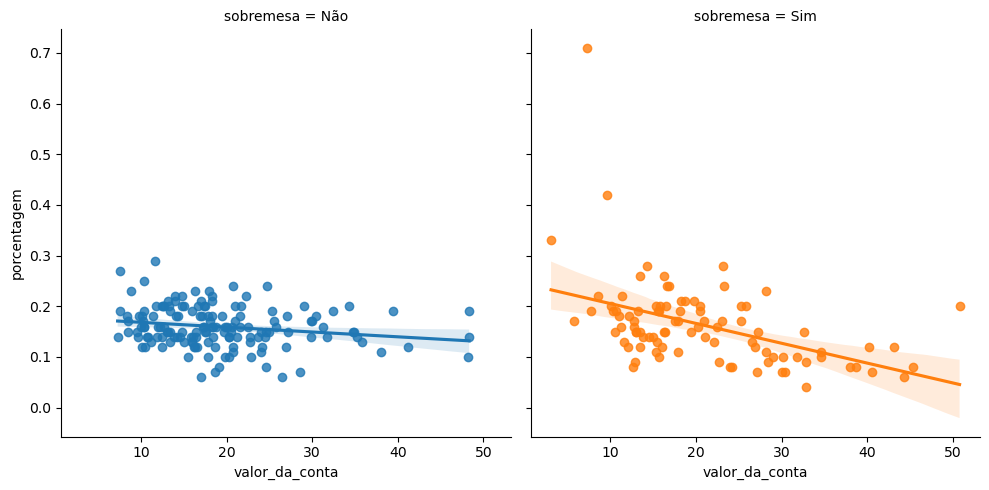

In [65]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

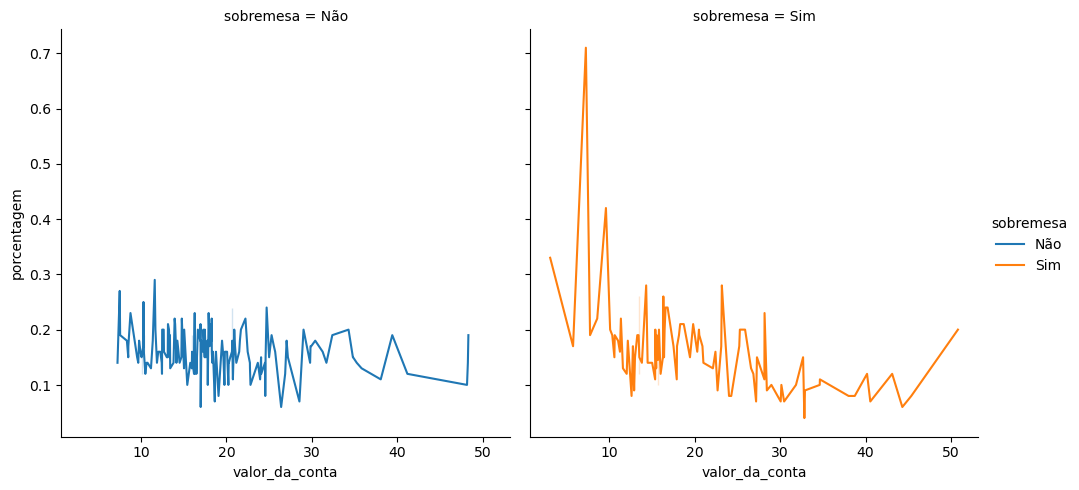

In [68]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

#### Teste de hipótese

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [75]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sobremesa

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [76]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem, Length: 151, dtype: float64

In [83]:
r = ranksums(sobremesa, sem_sobremesa)
print(f'O valor do p-value é: {(r.pvalue).round(3)}')

O valor do p-value é: 0.527


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

#### Análise III - Dia da semana

In [84]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

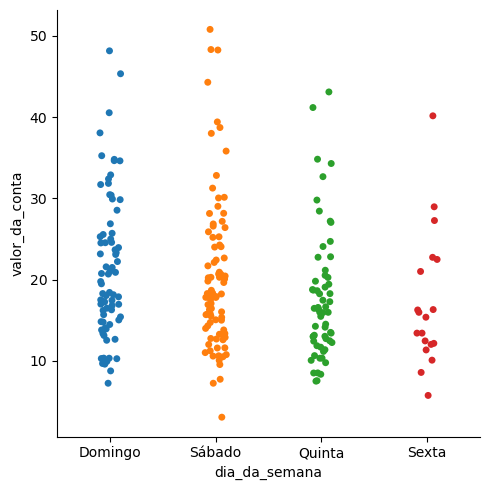

In [86]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

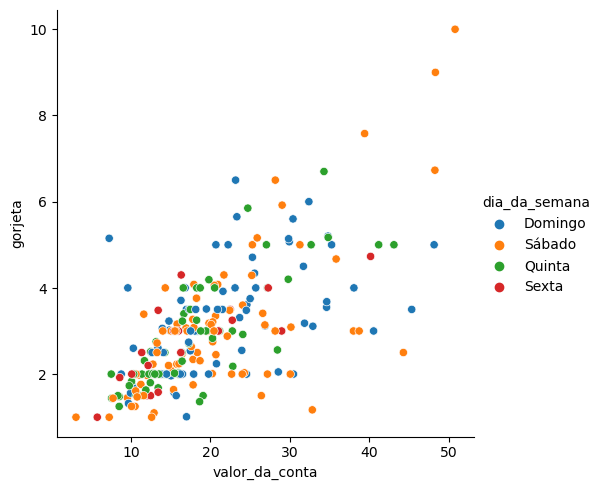

In [91]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

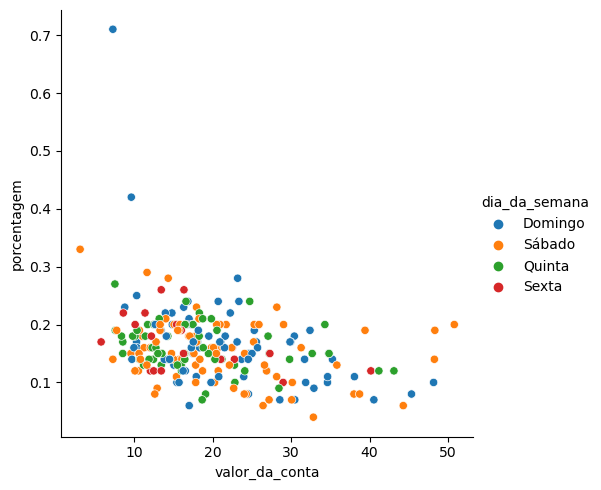

In [92]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

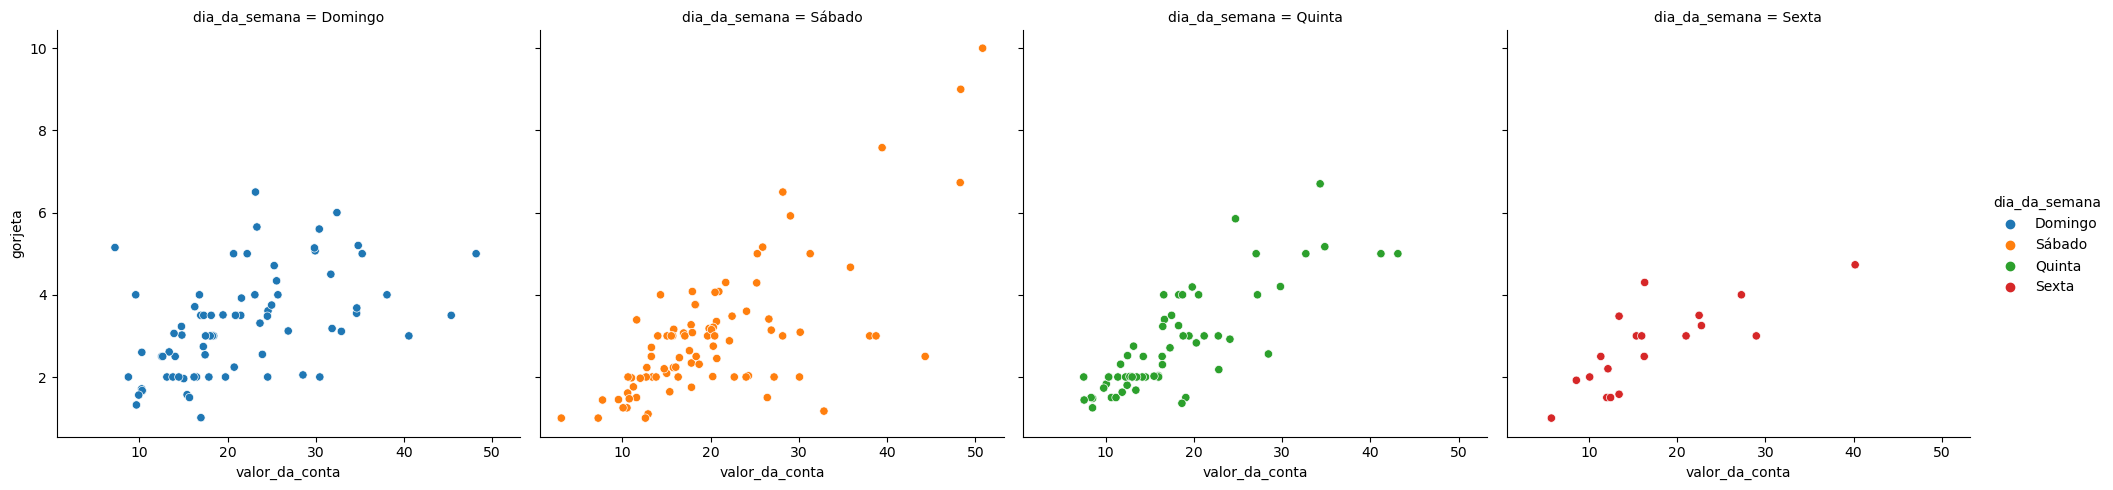

In [94]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

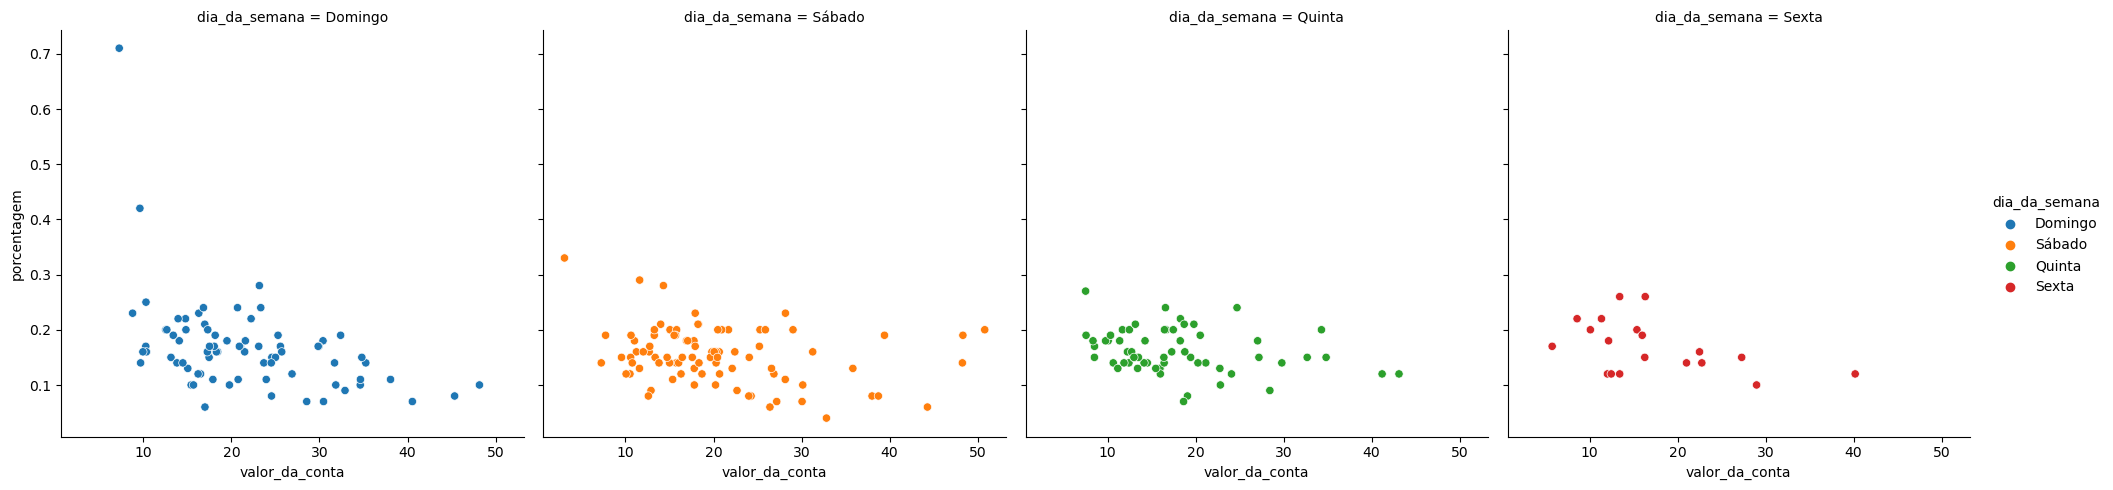

In [95]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

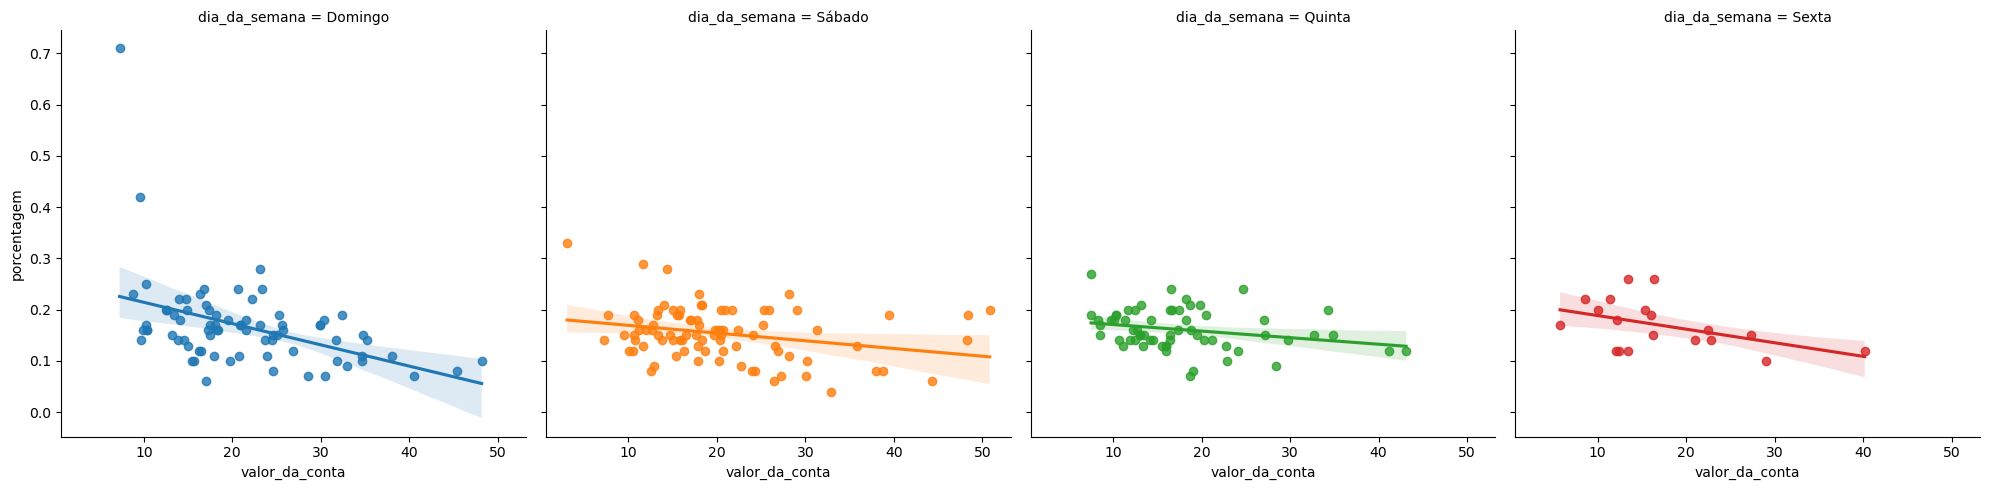

In [97]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [104]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print(f'A média das gorjetas é {media_geral_gorjetas}')

A média das gorjetas é 2.9982786885245902


In [106]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [108]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

#### Teste de hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

>****A distribuição do valor da conta não é igual no sábado e no domingo**

In [116]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor do p-value é: {r2.pvalue}')

O valor do p-value é: 0.3576728477868443


**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sábado e no domingo**

#### Análise IV - Hora do dia

In [117]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

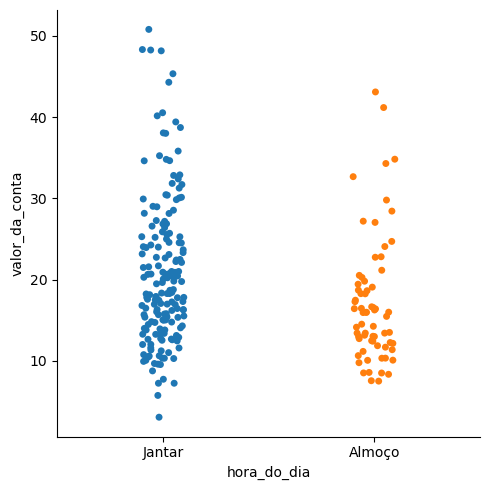

In [120]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

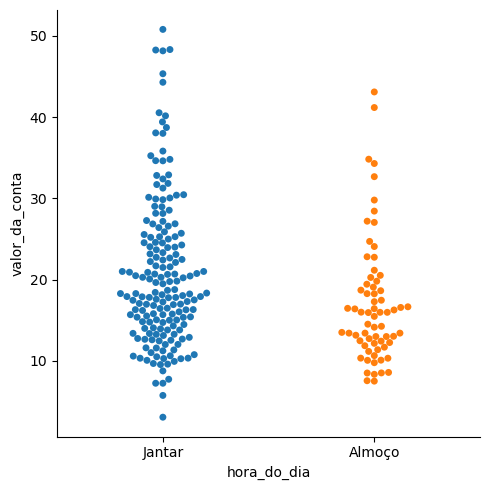

In [119]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

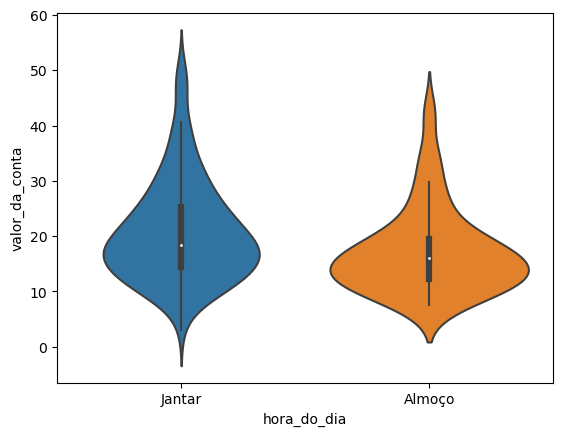

In [121]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

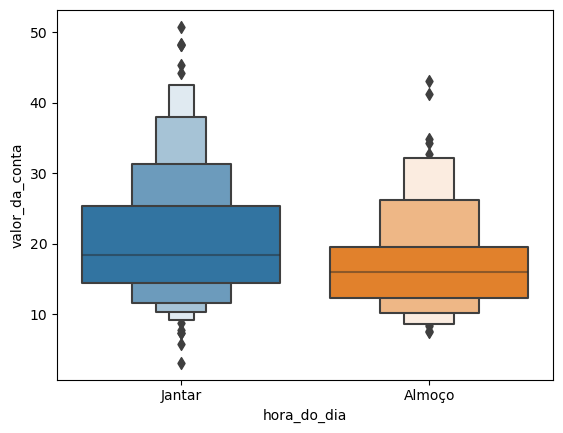

In [122]:
sns.boxenplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [139]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

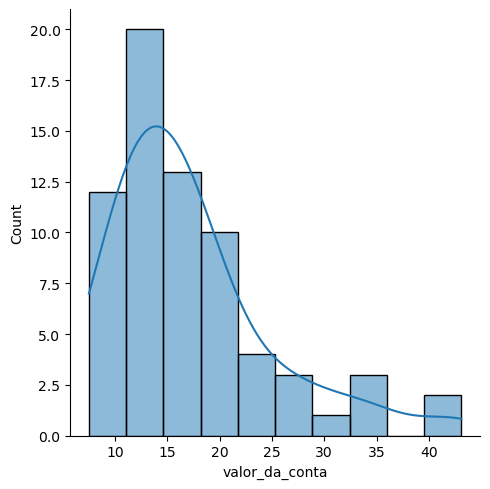

In [136]:
sns.displot(almoco, kde='False')

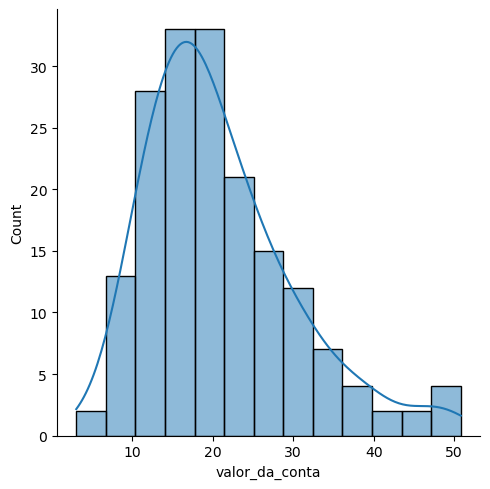

In [132]:
sns.displot(jantar, kde='False')

In [138]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [140]:
r3 = ranksums(almoco, jantar)
print(f'O valor de p-value é: {r3.pvalue}')

O valor de p-value é: 0.0011791039723641672


**H<sup>alt</sup>**

>**A distribuição do valor  da conta não é igual no jantar e no almoço**

**H<sup>null</sup>**

>**A distribuição do valor  da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**

>**A distribuição do valor  da conta não é igual no jantar e no almoço**

In [143]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem
r4 = ranksums(porcentagem_jantar, porcentagem_almoco)
print(f'O valor de p-value é {r4.pvalue}')

O valor de p-value é 0.2602493995587126


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**